In [49]:
# This tutorial is based on the following tutorial
# Webpage: https://towardsdatascience.com/visualizing-elmo-contextual-vectors-94168768fdaa
# Git-repo: https://github.com/hengluchang/visualizing_contextual_vectors/blob/master/elmo_vis.py
!pip install allennlp

     |████████████████████████████████| 7.6MB 4.8MB/s 
     |████████████████████████████████| 133kB 46.8MB/s 
     |████████████████████████████████| 225kB 28.8MB/s 
     |████████████████████████████████| 61kB 24.1MB/s 
     |████████████████████████████████| 163kB 41.3MB/s 
     |████████████████████████████████| 51kB 18.7MB/s 
     |████████████████████████████████| 256kB 40.2MB/s 
     |████████████████████████████████| 245kB 34.9MB/s 
     |████████████████████████████████| 655kB 45.1MB/s 
     |████████████████████████████████| 1.0MB 25.4MB/s 
  Created wheel for overrides: filename=overrides-1.9-cp36-none-any.whl size=4214 sha256=06b8ad3b86604b1277d217d60be4a7d023c622507b203b75e26049d7c941507f
  Stored in directory: /root/.cache/pip/wheels/8d/52/86/e5a83b1797e7d263b458d2334edd2704c78508b3eea9323718
  Created wheel for ftfy: filename=ftfy-5.6-cp36-none-any.whl size=44553 sha256=5d7d04976b520bc09cc41387d8e0bd03a1f93125af1989303eb62c5d975d29a1
  Stored in directory: /root/.cache/p

In [0]:
from matplotlib import pyplot as plt
from collections import OrderedDict

import numpy as np
from allennlp.commands.elmo import ElmoEmbedder
from sklearn.decomposition import PCA

%matplotlib inline

In [0]:

class Elmo:
    def __init__(self):
        self.elmo = ElmoEmbedder()

    # Append each word vector into a matrix
    def get_elmo_vector(self, tokens, layer):
        vectors = self.elmo.embed_sentence(tokens)
        X = []
        for vector in vectors[layer]:
            X.append(vector)

        X = np.array(X)

        return X


def dim_reduction(X, n):
    pca = PCA(n_components=n)
    print("size of X: {}".format(X.shape))
    results = pca.fit_transform(X)
    print("size of reduced X: {}".format(results.shape))

    for i, ratio in enumerate(pca.explained_variance_ratio_):
        print("Variance retained ratio of PCA-{}: {}".format(i+1, ratio))

    return results


def plot(word, token_list, reduced_X, file_name, title):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    # plot ELMo vectors
    i = 0
    for j, token in enumerate(token_list):
        color = pick_color(j)
        for _, w in enumerate(token):

            # only plot the word of interest
            if w.lower() in [word, word + 's', word + 'ing', word + 'ed']:
                ax.plot(reduced_X[i, 0], reduced_X[i, 1], color)
            i += 1

    tokens = []
    for token in token_list:
        tokens += token

    # annotate point
    k = 0
    for i, token in enumerate(tokens):
        if token.lower() in [word, word + 's', word + 'ing', word + 'ed']:
            text = ' '.join(token_list[k])

            # bold the word of interest in the sentence
            text = text.replace(token, r"$\bf{" + token + "}$")

            plt.annotate(text, xy=(reduced_X[i, 0], reduced_X[i, 1]))
            k += 1

    ax.set_title(title)
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")
    fig.savefig(file_name, bbox_inches="tight")

    print("{} saved\n".format(file_name))


def pick_color(i):
    if i == 0:
        color = 'ro'
    elif i == 1:
        color = 'bo'
    elif i == 2:
        color = 'yo'
    elif i == 3:
        color = 'go'
    else:
        color = 'co'
    return color


In [68]:
model = Elmo()

banks = OrderedDict()
banks[0] = "One can deposit money at the bank"
banks[1] = "He had a nice walk along the river bank"
banks[2] = "I withdrew cash from the bank"
banks[3] = "The river bank was not clean"
banks[4] = "My wife and I have a joint bank account"

cans = OrderedDict()
cans[0] = "One can deposit money at the bank"
cans[1] = "I have a can of coke"
cans[2] = "I can take care of myself"
cans[3] = "You'll need a can of tuna for this recipe."
cans[4] = "He works in a factory where they can fruit."




# works = OrderedDict()
# works[0] = "I like this beautiful work by Andy Warhol"
# works[1] = "Employee works hard every day"
# works[2] = "My sister works at Starbucks"
# works[3] = "This amazing work was done in the early nineteenth century"
# works[4] = "Hundreds of people work in this building"

# plants = OrderedDict()
# plants[0] = "The gardener planted some trees in my yard"
# plants[1] = "I plan to plant a Joshua tree tomorrow"
# plants[2] = "My sister planted a seed and hopes it will grow to a tree"
# plants[3] = "This kind of plant only grows in the subtropical region"
# plants[4] = "Most of the plants will die without water"

# words = {
# "bank": banks,
# "work": works,
# "plant": plants
# }

# contextual vectors for ELMo layer 1 and 2
#for layer in [1, 2]:
layer = 1 
  #for word, sentences in words.items():
word = 'can'
sentences = cans
print("visualizing word {} using ELMo layer {}".format(word, layer))
X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                          layer=layer)
                    for idx, _ in enumerate(sentences)], axis=0)

# The first 2 principal components
X_reduce = dim_reduction(X=X, n=2)

token_list = [] #[[w11,...,w1n], [w21,...,w2n],...,[w51,...,w5n]]
for _, sentence in sentences.items():
    token_list.append(sentence.split())

file_name = "{}_elmo_layer_{}.png".format(word, layer)
title = "Layer {} ELMo vectors of the word {}".format(layer, word)
#plot(word, token_list, X_reduce, file_name, title)


visualizing word can using ELMo layer 1
size of X: (37, 1024)
size of reduced X: (37, 2)
Variance retained ratio of PCA-1: 0.08478674292564392
Variance retained ratio of PCA-2: 0.0785316750407219


In [57]:
len(token_list)

5

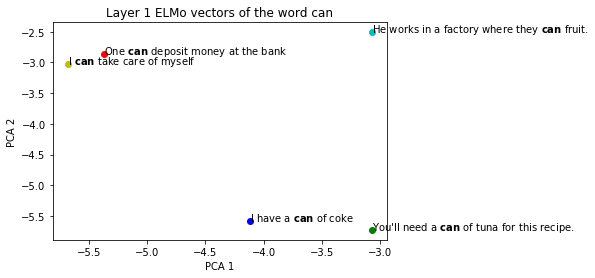

In [69]:
fig, ax = plt.subplots()

# plot ELMo vectors
i = 0 #token_id
for j, token in enumerate(token_list):
    color = pick_color(j)
    for _, w in enumerate(token):

        # only plot the word of interest
        if w.lower() in [word, word + 's', word + 'ing', word + 'ed']:
            ax.plot(X_reduce[i, 0], X_reduce[i, 1], color)
        i += 1

tokens = [] #flatten token_list
for token in token_list:
    tokens += token
    
    
# annotate point
k = 0
for i, token in enumerate(tokens):
    if token.lower() in [word, word + 's', word + 'ing', word + 'ed']:
        text = ' '.join(token_list[k])

        # bold the word of interest in the sentence
        text = text.replace(token, r"$\bf{" + token + "}$")

        plt.annotate(text, xy=(X_reduce[i, 0], X_reduce[i, 1]))
        k += 1

ax.set_title(title)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
#fig.savefig(file_name, bbox_inches="tight")
plt.show()

visualizing word can using ELMo layer 1
size of X: (37, 1024)
size of reduced X: (37, 2)
Variance retained ratio of PCA-1: 0.0847882404923439
Variance retained ratio of PCA-2: 0.07860555499792099
can_elmo_layer_1.png saved

visualizing word can using ELMo layer 2
size of X: (37, 1024)
size of reduced X: (37, 2)
Variance retained ratio of PCA-1: 0.09735950082540512
Variance retained ratio of PCA-2: 0.08093512058258057
can_elmo_layer_2.png saved



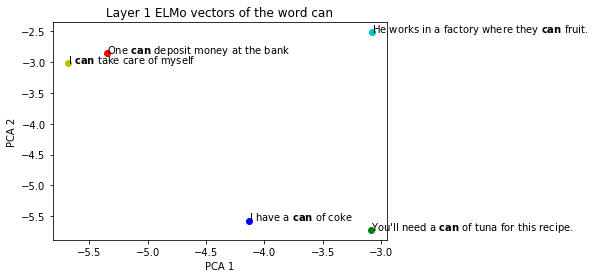

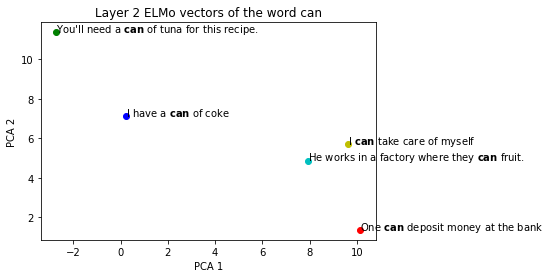

In [70]:
for layer in [1, 2]:
        #for word, sentences in words.items():
        print("visualizing word {} using ELMo layer {}".format(word, layer))
        X = np.concatenate([model.get_elmo_vector(tokens=sentences[idx].split(),
                                                  layer=layer)
                            for idx, _ in enumerate(sentences)], axis=0)

        # The first 2 principal components
        X_reduce = dim_reduction(X=X, n=2)

        token_list = []
        for _, sentence in sentences.items():
            token_list.append(sentence.split())

        file_name = "{}_elmo_layer_{}.png".format(word, layer)
        title = "Layer {} ELMo vectors of the word {}".format(layer, word)
        plot(word, token_list, X_reduce, file_name, title)